# INTRODUCTION

## Dry Eye Disease Prediction Using Machine Learning

**Dry Eye Disease(DED)** is a prevalent ocular condition affecting millions worldwide,often caused by factors such as age,stress levels,sleep disorders and underlying health conditions.Early detection and diagnosis are crucial for preventing long-term discomfort and visual problems.Machine learning provides an efficient way to analyze health-related data and predict the likelihood of Dry EYe Disease based on multiple physiological lifestyle factors.

In this project,we apply **supervised machine learning techniques** to classify patients as having Dry Eye Disease or not.

The workflow includes:



1.**Data Loading**: Loading the dataset by importing necessary libraries.

2.**Data Visualization**: Creating visualizations to explore the distribution of features and exploratory data analysis(EDA).

3.**Data Preprocessing**:Handling missing values,scaling numerical features and encoding categorical variable.

4.**Model Training & Hyperparameter Tuning**: Using **Logistic Regression, Decision Tree, Random Forest,K-Nearest Neighbors(KNN) and Support Vector MAchine(SVM)** to identify best performing model
   

5.**Model Evaluation**: Comparing performance of different models and selecting the best one based on its accuaracy

6.**Feature Importance Analysis**: Identifying the most influential factors contributing to Dry Eye Disease.

By leveraging machine learning,this aims to develop an **accurate,data-driven approach** for predicting Dry Eye Disease,potentially aiding healthcare professionals in early interventio and better treatment strategies

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import warnings
warnings.filterwarnings('ignore')

### DATA LOADING

In [14]:
df=pd.read_csv("C:\\Users\\NovoGenomics-F\\Downloads\\Dry_Eye_Dataset.csv")

In [15]:
df

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,M,26,9.4,2,3,132/64,91,20000,88,200,...,Y,Y,Y,Y,3.8,N,Y,N,Y,Y
19996,F,39,7.3,3,4,101/75,65,2000,53,195,...,N,Y,Y,N,3.8,N,N,Y,N,Y
19997,F,20,8.0,5,3,124/63,78,10000,17,186,...,Y,Y,N,N,8.4,N,N,Y,N,N
19998,M,38,4.5,3,3,136/70,60,3000,115,170,...,Y,N,Y,N,2.2,N,N,N,Y,Y


### DATA EXPLORATION

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

In [18]:
df.dropna(inplace=True)

In [19]:
df=df.drop_duplicates()

### DATA VISUALIZATION

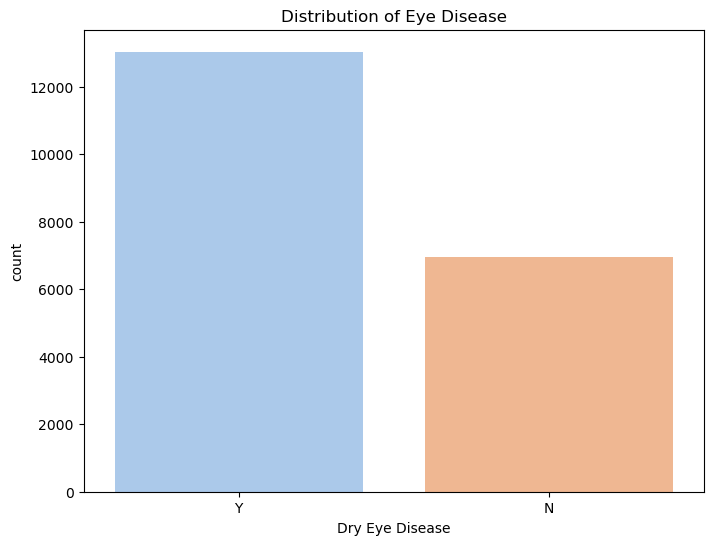

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Dry Eye Disease',palette='pastel')
plt.title("Distribution of Eye Disease")
plt.show()

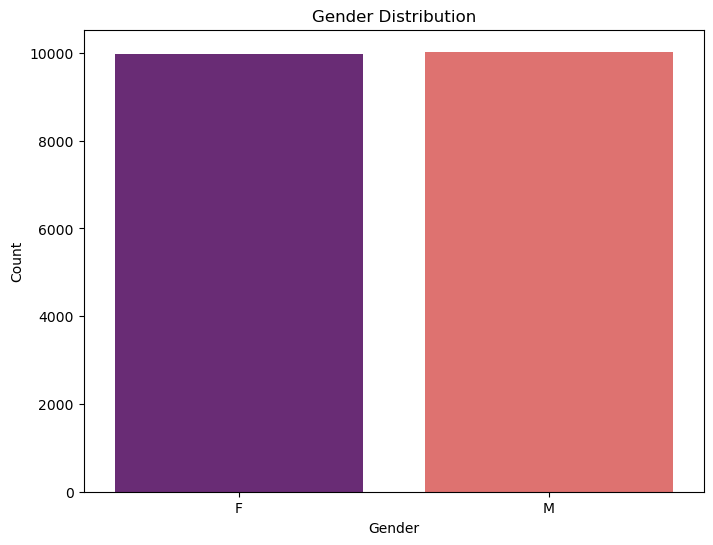

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df,palette='magma')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

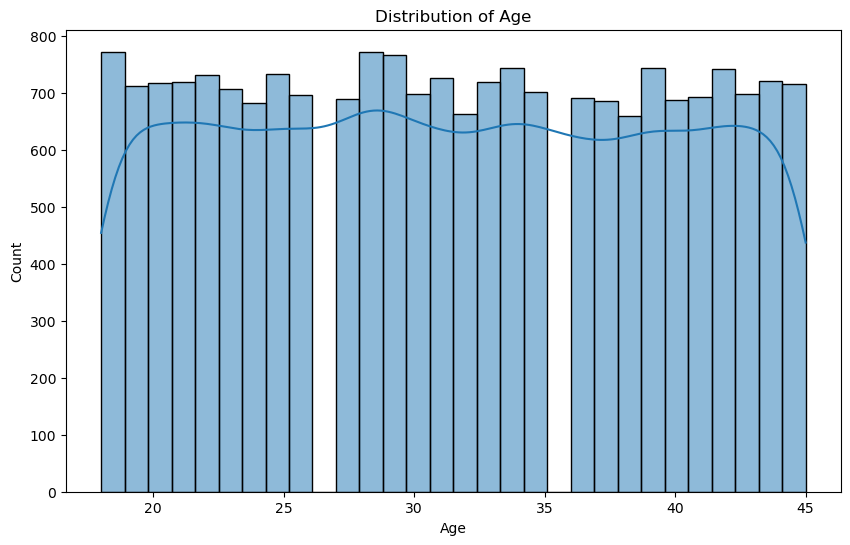

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

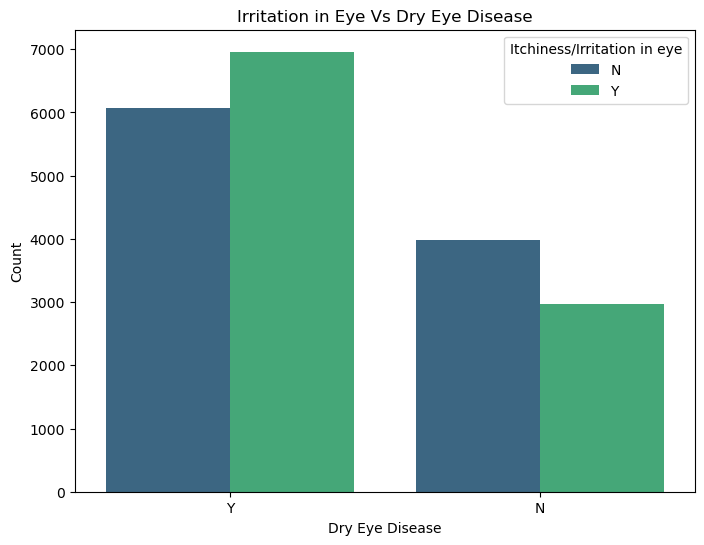

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='Dry Eye Disease',hue='Itchiness/Irritation in eye',palette='viridis')
plt.title("Irritation in Eye Vs Dry Eye Disease")
plt.xlabel("Dry Eye Disease")
plt.ylabel("Count")
plt.show()

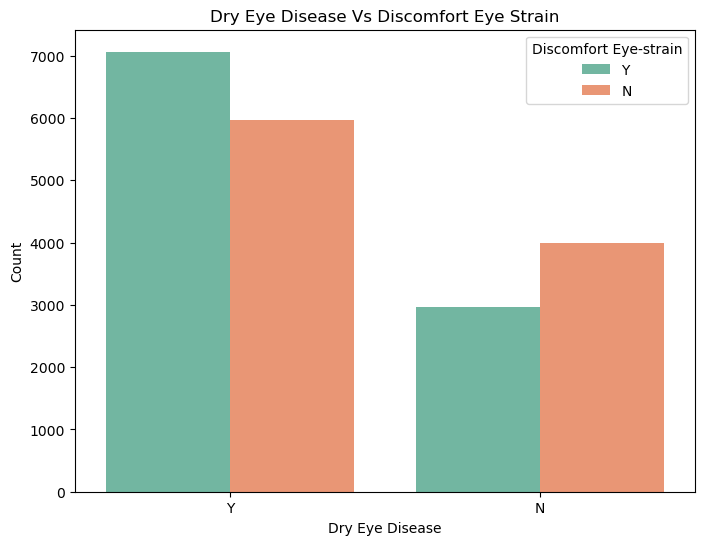

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='Dry Eye Disease',hue='Discomfort Eye-strain',palette='Set2')
plt.title("Dry Eye Disease Vs Discomfort Eye Strain")
plt.xlabel("Dry Eye Disease")
plt.ylabel("Count")
plt.show()

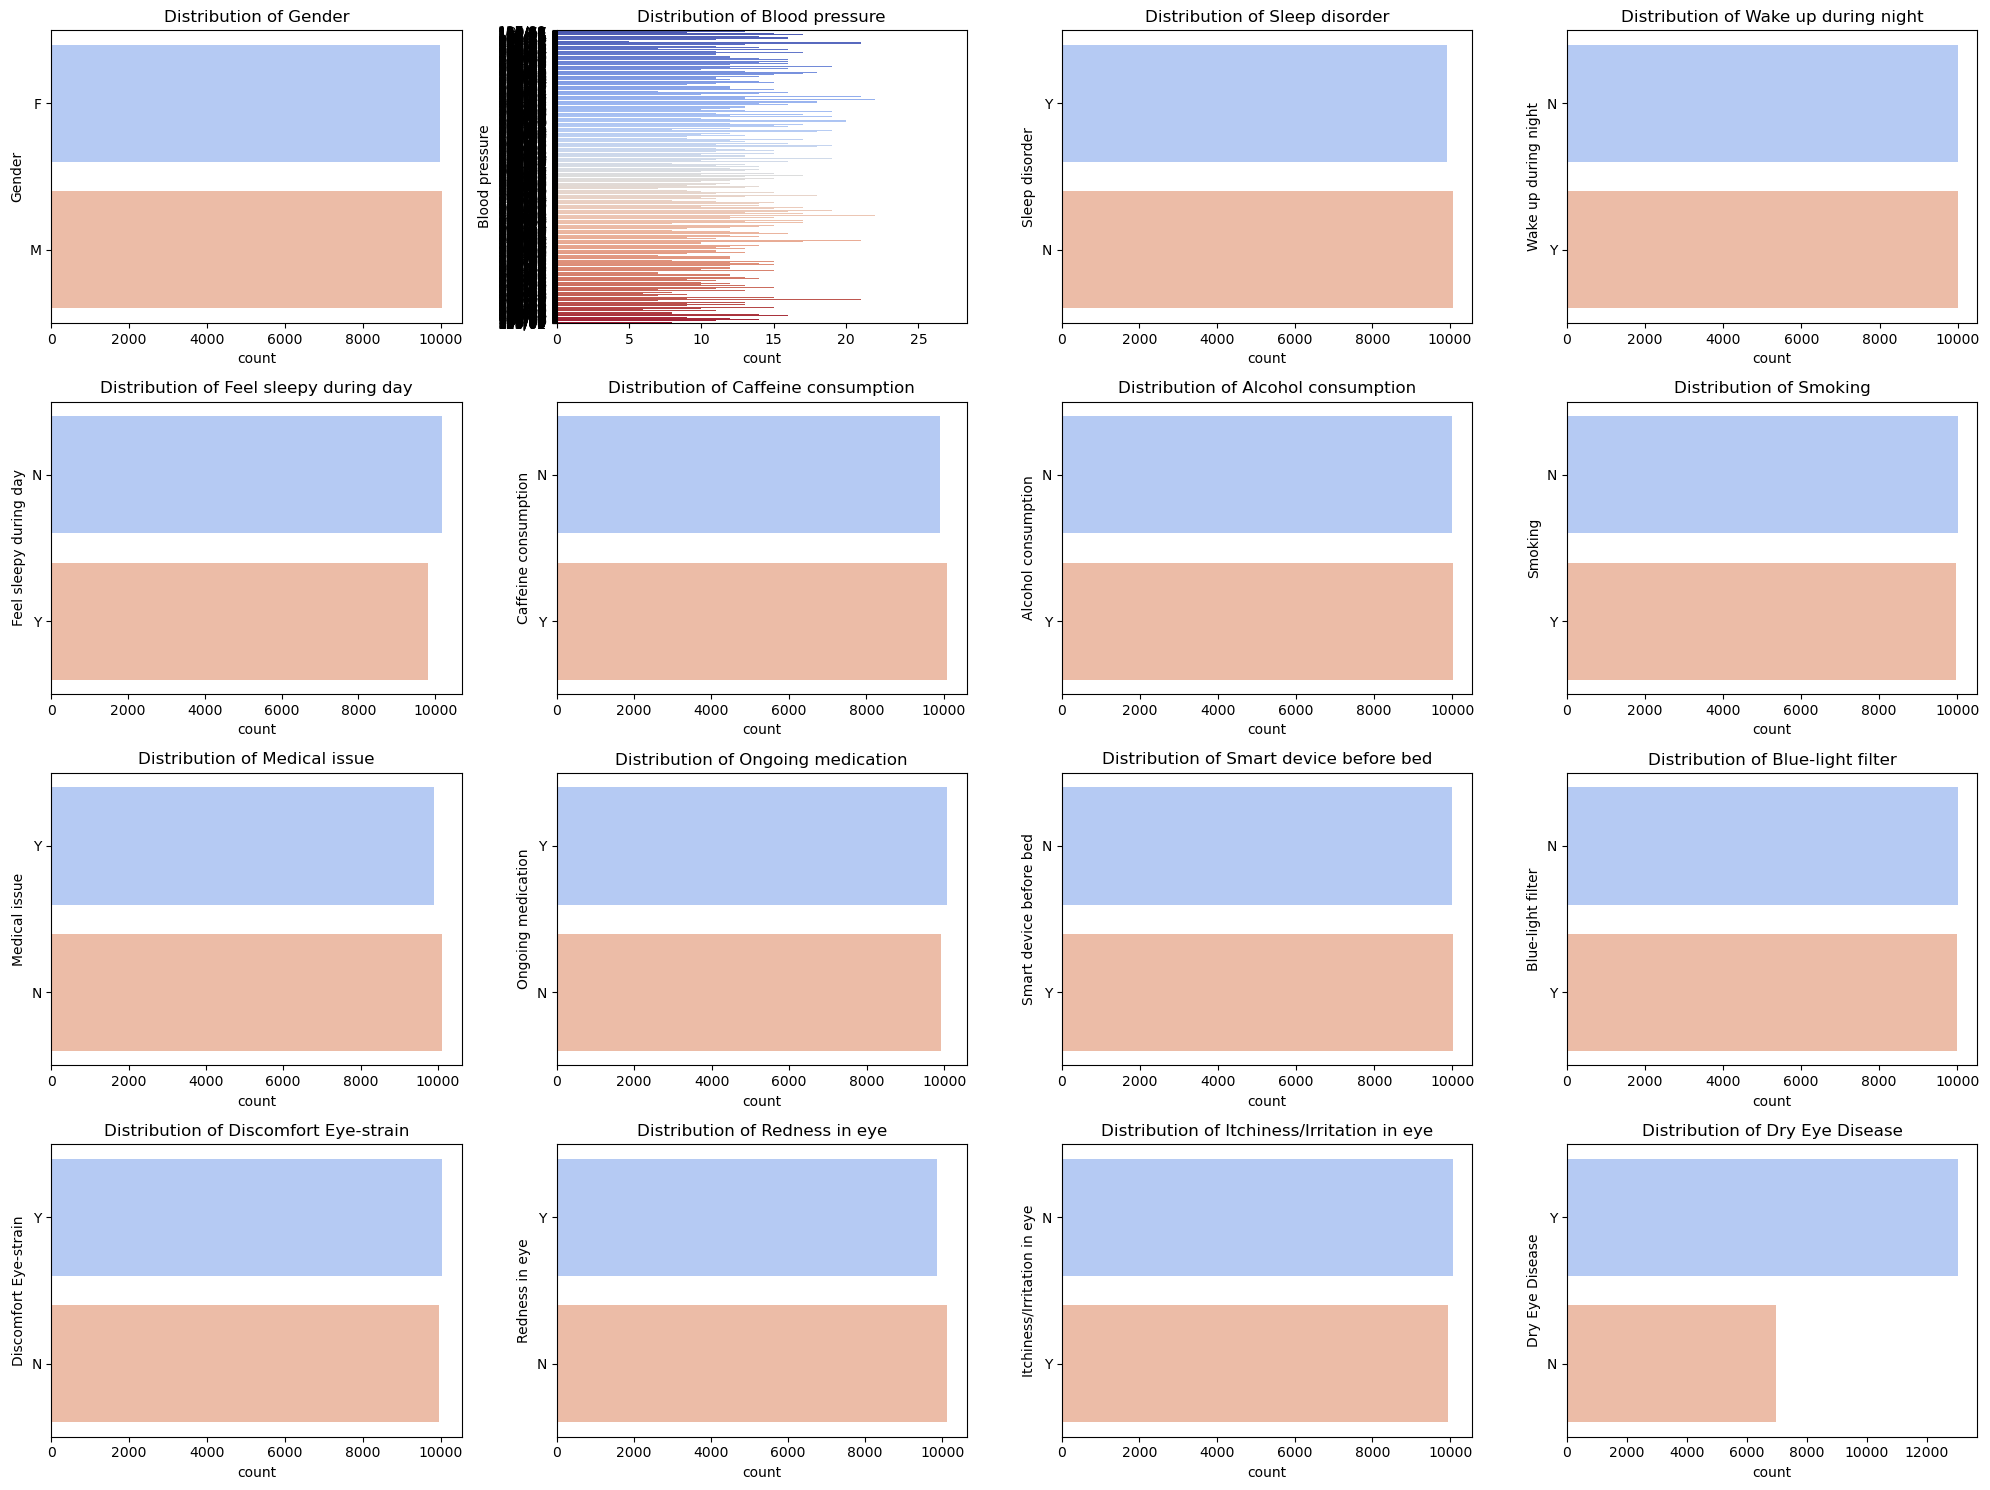

In [26]:
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(y=col, data=df, palette="coolwarm")
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

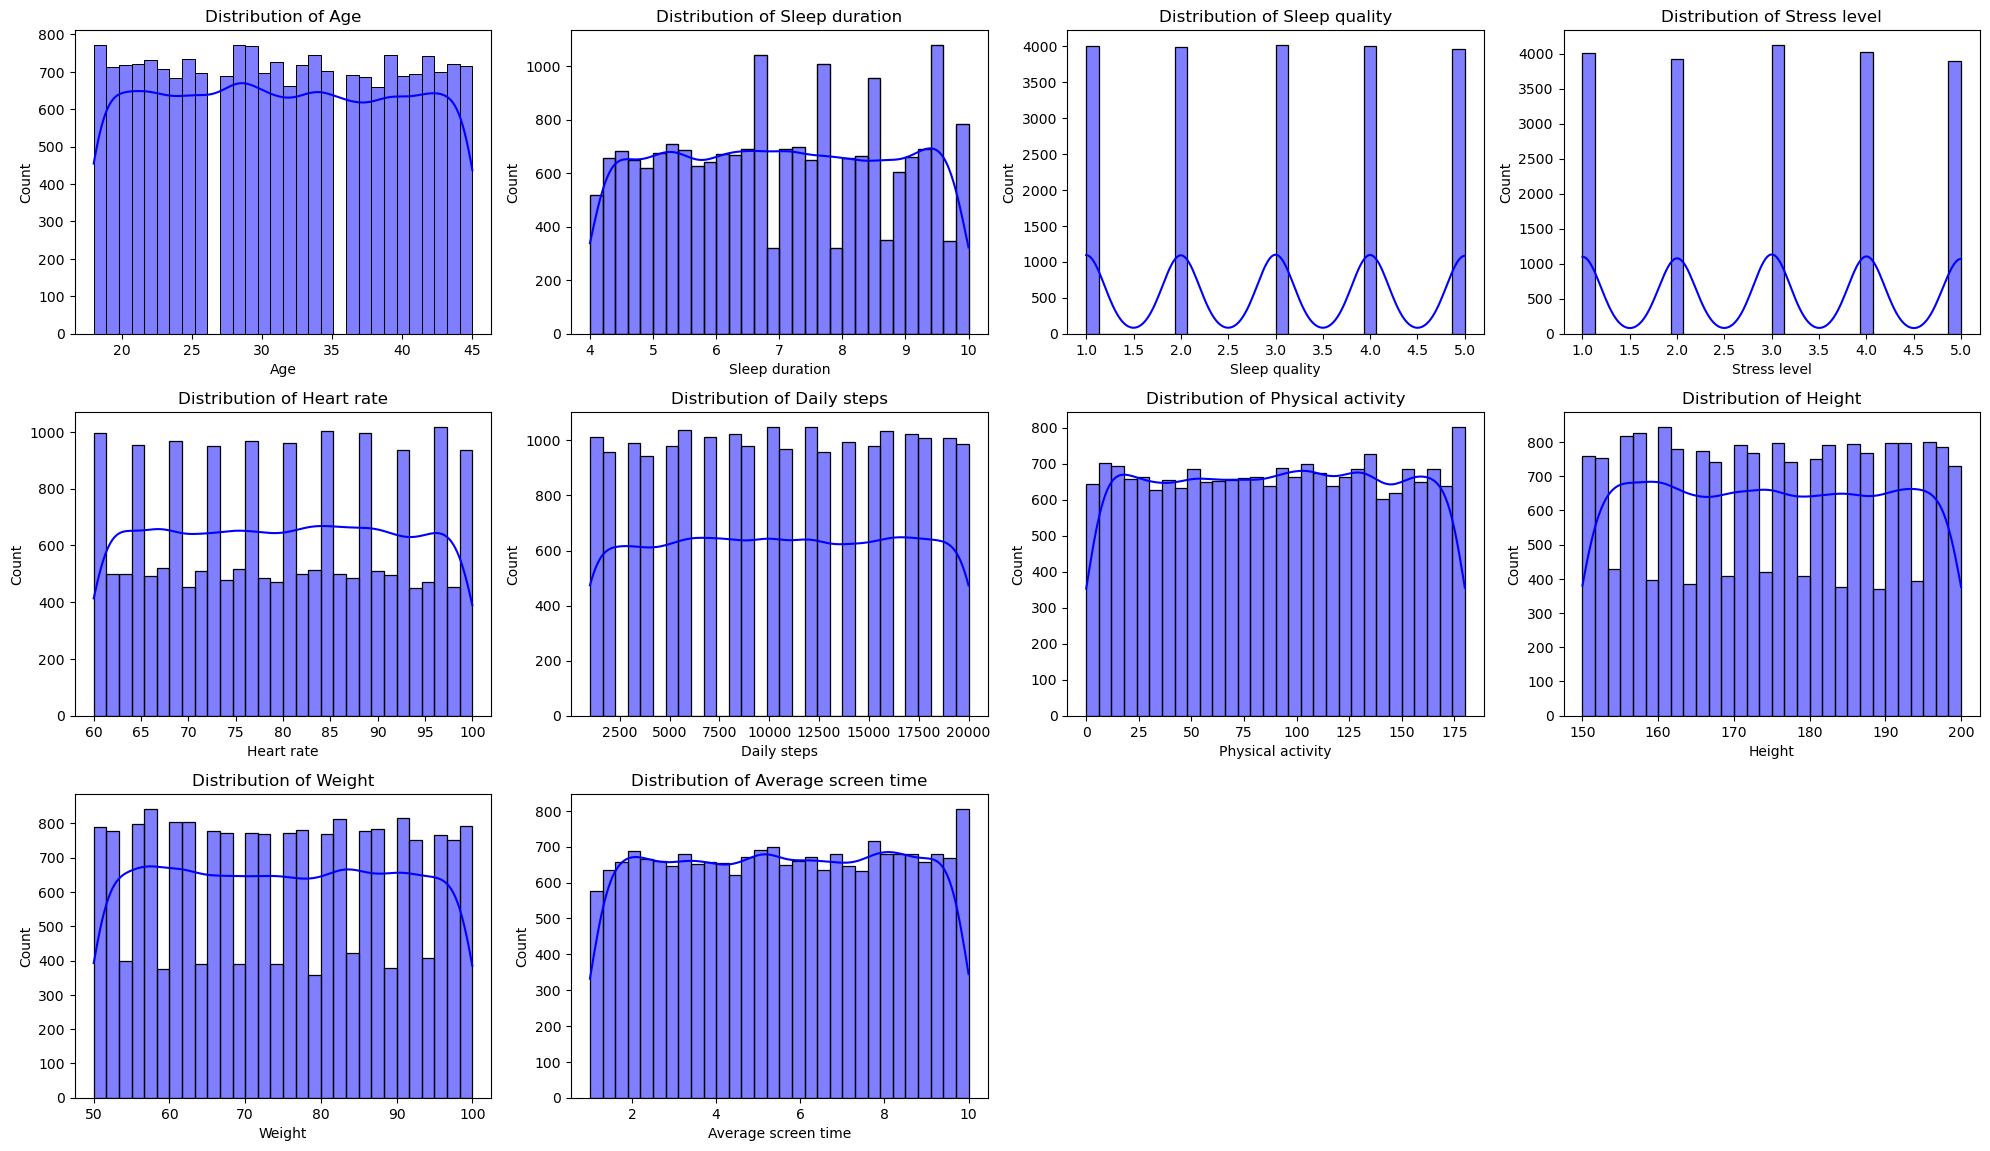

In [27]:
numerical_cols = df.select_dtypes(exclude=['object']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

In [28]:
numeric_df = df.select_dtypes(include=[ 'int64', 'float64'])
numeric_df.head()
cor=numeric_df.corr()
cor

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time
Age,1.000000,0.004857,0.002513,0.008379,-0.001196,0.001302,-0.009191,-0.005171,0.003908,0.003177
Sleep duration,0.004857,1.000000,-0.006892,-0.006088,-0.029175,0.002823,0.001858,0.005259,0.000222,-0.004208
Sleep quality,0.002513,-0.006892,1.000000,0.000721,-0.014326,-0.003074,-0.010329,0.009380,0.005604,0.004697
Stress level,0.008379,-0.006088,0.000721,1.000000,-0.008332,-0.005978,0.004272,-0.000651,-0.000611,-0.001344
Heart rate,-0.001196,-0.029175,-0.014326,-0.008332,1.000000,-0.001899,0.001334,-0.005229,-0.009639,0.002467
Daily steps,0.001302,0.002823,-0.003074,-0.005978,-0.001899,1.000000,0.008413,-0.016801,-0.000619,-0.008670
Physical activity,-0.009191,0.001858,-0.010329,0.004272,0.001334,0.008413,1.000000,-0.005989,0.016160,0.006469
Height,-0.005171,0.005259,0.009380,-0.000651,-0.005229,-0.016801,-0.005989,1.000000,-0.000974,0.012817
Weight,0.003908,0.000222,0.005604,-0.000611,-0.009639,-0.000619,0.016160,-0.000974,1.000000,0.007798
Average screen time,0.003177,-0.004208,0.004697,-0.001344,0.002467,-0.008670,0.006469,0.012817,0.007798,1.000000


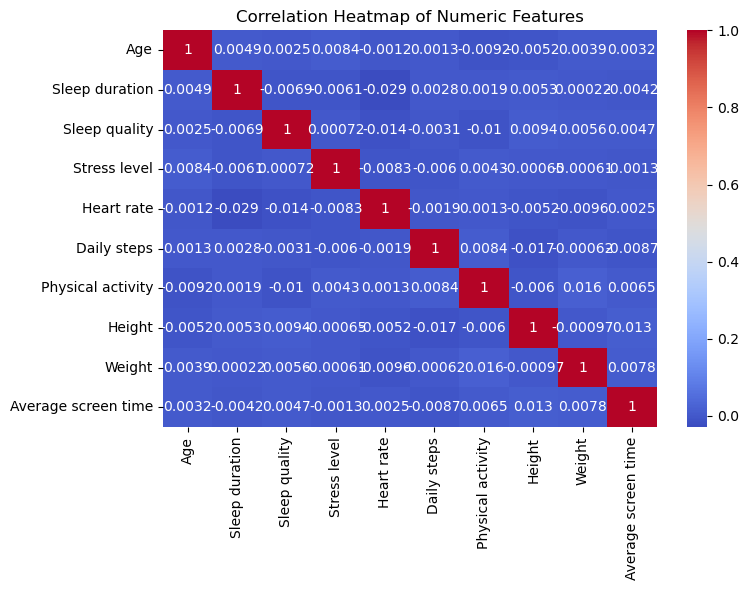

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

### DATA PREPROCESSING

In [31]:
df[['Systolic BP','Diastolic BP']]=df['Blood pressure'].str.split('/',expand=True).astype(int)
df=df.drop(columns=['Blood pressure'])                                                                 

In [32]:
df.columns

Index(['Gender', 'Age', 'Sleep duration', 'Sleep quality', 'Stress level',
       'Heart rate', 'Daily steps', 'Physical activity', 'Height', 'Weight',
       'Sleep disorder', 'Wake up during night', 'Feel sleepy during day',
       'Caffeine consumption', 'Alcohol consumption', 'Smoking',
       'Medical issue', 'Ongoing medication', 'Smart device before bed',
       'Average screen time', 'Blue-light filter', 'Discomfort Eye-strain',
       'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease',
       'Systolic BP', 'Diastolic BP'],
      dtype='object')

In [33]:
df

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,...,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic BP,Diastolic BP
0,F,24,9.5,2,1,67,3000,31,161,69,...,Y,N,8.7,N,Y,Y,N,Y,137,89
1,M,39,9.6,2,3,60,12000,74,164,87,...,Y,N,9.6,Y,N,N,Y,Y,108,64
2,F,45,5.4,1,5,95,12000,93,179,94,...,N,Y,4.0,N,Y,N,N,N,134,81
3,F,45,5.4,4,5,78,19000,32,160,77,...,N,N,7.6,N,Y,N,Y,N,110,90
4,F,42,5.7,3,2,72,4000,173,179,99,...,N,N,3.5,N,Y,Y,N,Y,99,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,M,26,9.4,2,3,91,20000,88,200,72,...,Y,Y,3.8,N,Y,N,Y,Y,132,64
19996,F,39,7.3,3,4,65,2000,53,195,96,...,Y,N,3.8,N,N,Y,N,Y,101,75
19997,F,20,8.0,5,3,78,10000,17,186,87,...,N,N,8.4,N,N,Y,N,N,124,63
19998,M,38,4.5,3,3,60,3000,115,170,66,...,Y,N,2.2,N,N,N,Y,Y,136,70


### DATA ENCODING

In [35]:
df=pd.get_dummies(df,columns=['Gender','Sleep disorder','Wake up during night','Feel sleepy during day','Caffeine consumption',
                              'Alcohol consumption','Smoking','Medical issue','Ongoing medication','Smart device before bed',
                              'Blue-light filter','Discomfort Eye-strain','Redness in eye','Itchiness/Irritation in eye','Dry Eye Disease'],
                 drop_first=True,dtype=int)

### MODEL BUILDING

In [37]:
X=df.drop('Dry Eye Disease_Y',axis=1)

In [38]:
y=df['Dry Eye Disease_Y']

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
X_train=scaler.fit_transform(X_train)

In [44]:
X_test=scaler.transform(X_test)

In [45]:
from sklearn.metrics import accuracy_score,classification_report

#### LOGISTIC REGRESSION

In [47]:
C_values=[0.01,1,10,100]
log_results=[]

from sklearn.linear_model import LogisticRegression

for C in C_values:
    log_model=LogisticRegression(C=C,random_state=42)
    log_model.fit(X_train,y_train)
    log_y_pred=log_model.predict(X_test)
    log_accuracy=accuracy_score(y_test,log_y_pred)
    log_report=classification_report(y_test,log_y_pred)
    log_results.append((C,log_accuracy))
    print(f"Logistic Regression with C={C} Accuracy:{log_accuracy*100:.2f}%")
    print(f"Logistic Regression with C={C} Classifiaction Report:\n",log_report)

Logistic Regression with C=0.01 Accuracy:69.00%
Logistic Regression with C=0.01 Classifiaction Report:
               precision    recall  f1-score   support

           0       0.61      0.15      0.24      1307
           1       0.70      0.95      0.81      2693

    accuracy                           0.69      4000
   macro avg       0.65      0.55      0.52      4000
weighted avg       0.67      0.69      0.62      4000

Logistic Regression with C=1 Accuracy:69.45%
Logistic Regression with C=1 Classifiaction Report:
               precision    recall  f1-score   support

           0       0.62      0.16      0.26      1307
           1       0.70      0.95      0.81      2693

    accuracy                           0.69      4000
   macro avg       0.66      0.56      0.53      4000
weighted avg       0.68      0.69      0.63      4000

Logistic Regression with C=10 Accuracy:69.45%
Logistic Regression with C=10 Classifiaction Report:
               precision    recall  f1-score 

#### DECISION TREE

In [49]:
min_split=[2, 5, 10, 20, 50, 100,500]
dt_results=[]

from sklearn.tree import DecisionTreeClassifier

for i in min_split:
    dt_model=DecisionTreeClassifier(min_samples_split=i,random_state=42)
    dt_model.fit(X_train,y_train)
    dt_y_pred=dt_model.predict(X_test)
    dt_accuracy=accuracy_score(y_test,dt_y_pred)
    dt_report=classification_report(y_test,dt_y_pred)
    dt_results.append((i,dt_accuracy))
    print(f"Desicion Tree with min_sample_split={i} Accuracy={dt_accuracy*100:.2f}%")
    print(f"Decision Tree with min_sample_split={i} Classication Report:\n",dt_report) 

Desicion Tree with min_sample_split=2 Accuracy=56.33%
Decision Tree with min_sample_split=2 Classication Report:
               precision    recall  f1-score   support

           0       0.35      0.39      0.37      1307
           1       0.69      0.65      0.67      2693

    accuracy                           0.56      4000
   macro avg       0.52      0.52      0.52      4000
weighted avg       0.58      0.56      0.57      4000

Desicion Tree with min_sample_split=5 Accuracy=56.07%
Decision Tree with min_sample_split=5 Classication Report:
               precision    recall  f1-score   support

           0       0.35      0.39      0.37      1307
           1       0.69      0.64      0.66      2693

    accuracy                           0.56      4000
   macro avg       0.52      0.52      0.52      4000
weighted avg       0.57      0.56      0.57      4000

Desicion Tree with min_sample_split=10 Accuracy=54.87%
Decision Tree with min_sample_split=10 Classication Report:
   

#### RANDOM FOREST

In [51]:
estimators=[10,20,50,100,500]
rf_results=[]

from sklearn.ensemble import RandomForestClassifier

for n in estimators:
    rf_model=RandomForestClassifier(n_estimators=n,random_state=42)
    rf_model.fit(X_train,y_train)
    rf_y_pred=rf_model.predict(X_test)
    rf_accuracy=accuracy_score(y_test,rf_y_pred)
    rf_report=classification_report(y_test,rf_y_pred)
    rf_results.append((n,rf_accuracy))
    print(f"Random Forest with n_estimators={n} Accuracy:{rf_accuracy*100:.2f}%")
    print(f"Random Forest with n_estomators={n} Classification Report:\n",rf_report)

Random Forest with n_estimators=10 Accuracy:62.22%
Random Forest with n_estomators=10 Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.36      0.38      1307
           1       0.71      0.75      0.73      2693

    accuracy                           0.62      4000
   macro avg       0.56      0.55      0.55      4000
weighted avg       0.61      0.62      0.61      4000

Random Forest with n_estimators=20 Accuracy:66.38%
Random Forest with n_estomators=20 Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.27      0.34      1307
           1       0.71      0.86      0.77      2693

    accuracy                           0.66      4000
   macro avg       0.59      0.56      0.56      4000
weighted avg       0.63      0.66      0.63      4000

Random Forest with n_estimators=50 Accuracy:69.05%
Random Forest with n_estomators=50 Classification Report:
               pr

#### K-NEAREST NEIGHBORS

In [53]:
neighbors=[1, 3, 5, 7, 9, 11, 13, 15]
knn_results=[]

from sklearn.neighbors import KNeighborsClassifier

for n in neighbors:
    knn_model=KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train,y_train)
    knn_y_pred=knn_model.predict(X_test)
    knn_accuracy=accuracy_score(y_test,knn_y_pred)
    knn_report=classification_report(y_test,knn_y_pred)
    knn_results.append((n,knn_accuracy))
    print(f"K Nearest Neighbors with n_neighbors={n} Accuracy:{knn_accuracy*100:.2f}%")
    print(f"K Nearest Neighbors with n_neighbors={n} Classification Report:\n",knn_report)

K Nearest Neighbors with n_neighbors=1 Accuracy:56.75%
K Nearest Neighbors with n_neighbors=1 Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.38      0.36      1307
           1       0.69      0.66      0.67      2693

    accuracy                           0.57      4000
   macro avg       0.52      0.52      0.52      4000
weighted avg       0.58      0.57      0.57      4000

K Nearest Neighbors with n_neighbors=3 Accuracy:60.22%
K Nearest Neighbors with n_neighbors=3 Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.33      0.35      1307
           1       0.69      0.74      0.71      2693

    accuracy                           0.60      4000
   macro avg       0.53      0.53      0.53      4000
weighted avg       0.59      0.60      0.59      4000

K Nearest Neighbors with n_neighbors=5 Accuracy:61.90%
K Nearest Neighbors with n_neighbors=5 Classification R

#### SUPPORT VECTOR MACHINE

In [55]:
C_values=[0.1, 1, 10]
svm_results=[]

from sklearn.svm import SVC

for C in C_values:
    svm_model=SVC(kernel='linear',C=C,random_state=42)
    svm_model.fit(X_train,y_train)
    svm_y_pred=svm_model.predict(X_test)
    svm_accuracy=accuracy_score(y_test,svm_y_pred)
    svm_report=classification_report(y_test,svm_y_pred)
    svm_results.append((C,svm_accuracy))
    print(f"SVM with C value={C} Accuarcy:{svm_accuracy*100:.2f}%")
    print(f"SVM with C value={C} Classification Report:\n",svm_report)

SVM with C value=0.1 Accuarcy:67.33%
SVM with C value=0.1 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1307
           1       0.67      1.00      0.80      2693

    accuracy                           0.67      4000
   macro avg       0.34      0.50      0.40      4000
weighted avg       0.45      0.67      0.54      4000

SVM with C value=1 Accuarcy:67.33%
SVM with C value=1 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1307
           1       0.67      1.00      0.80      2693

    accuracy                           0.67      4000
   macro avg       0.34      0.50      0.40      4000
weighted avg       0.45      0.67      0.54      4000

SVM with C value=10 Accuarcy:67.33%
SVM with C value=10 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      13

### BEST MODEL

In [57]:
best_model=RandomForestClassifier(n_estimators=500,random_state=42)
best_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [58]:
y_pred=best_model.predict(X_test)

In [59]:
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [60]:
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Model Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.22      0.33      1307
           1       0.71      0.93      0.81      2693

    accuracy                           0.70      4000
   macro avg       0.67      0.58      0.57      4000
weighted avg       0.68      0.70      0.65      4000



### FEATURE IMPORTANCES

In [62]:
importances=best_model.feature_importances_
feature_importances_df=pd.DataFrame({'Feature':X.columns,'Importance':importances})

In [64]:
feature_importances_df = feature_importances_df.sort_values(by='Importance',ascending=False)

In [68]:
feature_importances_df 

,Feature,Importance
6,Physical activity,0.080407
9,Average screen time,0.077376
1,Sleep duration,0.073916
7,Height,0.072223
10,Systolic BP,0.072146
8,Weight,0.071447
4,Heart rate,0.069348
11,Diastolic BP,0.066173
0,Age,0.065034
5,Daily steps,0.059231


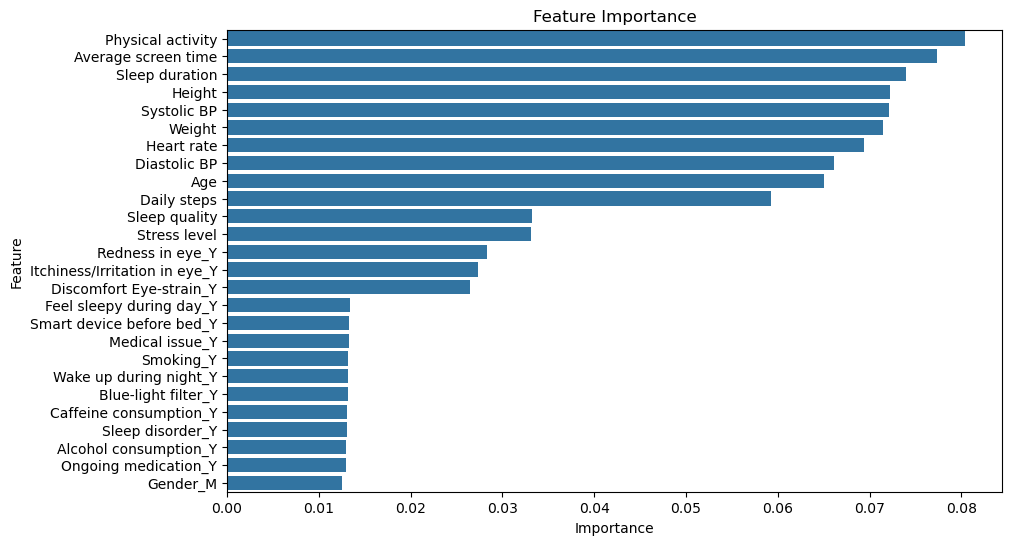

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances_df,x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [72]:
df.head(10)

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time,...,Alcohol consumption_Y,Smoking_Y,Medical issue_Y,Ongoing medication_Y,Smart device before bed_Y,Blue-light filter_Y,Discomfort Eye-strain_Y,Redness in eye_Y,Itchiness/Irritation in eye_Y,Dry Eye Disease_Y
0,24,9.5,2,1,67,3000,31,161,69,8.7,...,0,0,1,1,0,0,1,1,0,1
1,39,9.6,2,3,60,12000,74,164,87,9.6,...,1,0,1,1,0,1,0,0,1,1
2,45,5.4,1,5,95,12000,93,179,94,4.0,...,1,0,0,0,1,0,1,0,0,0
3,45,5.4,4,5,78,19000,32,160,77,7.6,...,0,0,1,0,0,0,1,0,1,0
4,42,5.7,3,2,72,4000,173,179,99,3.5,...,0,0,1,0,0,0,1,1,0,1
5,42,5.8,3,1,79,14000,110,174,64,2.6,...,1,1,1,1,1,1,1,0,1,1
6,26,4.8,5,2,63,6000,42,188,82,5.4,...,1,0,1,1,1,1,0,0,1,1
7,33,5.5,2,1,97,5000,71,162,91,4.5,...,1,0,0,1,0,1,1,0,0,1
8,36,6.3,1,2,78,7000,142,175,80,3.9,...,0,1,1,0,0,1,0,0,1,0
9,33,7.7,4,5,81,4000,105,163,65,5.7,...,1,0,1,1,0,0,0,1,1,1


In [74]:
sample_one=X.iloc[2].values
sample_one_df=pd.DataFrame([sample_one],columns=X.columns)
sample_one_scaled=scaler.transform(sample_one_df)
sample_one_prediction=best_model.predict(sample_one_scaled)
print(f"Dry Eye Disease Prediction of Sample One: {sample_one_prediction[0]}")

Dry Eye Disease Prediction of Sample One: 0


In [76]:
sample_two=X.iloc[6].values
sample_two_df=pd.DataFrame([sample_two],columns=X.columns)
sample_two_scaled=scaler.transform(sample_two_df)
sample_two_prediction=best_model.predict(sample_two_scaled)
print(f"Dry Eye Disease Prediction of Sample Two: {sample_two_prediction[0]}")

Dry Eye Disease Prediction of Sample Two: 1


# CONCLUSION

In this project,we explore Supervised Machine Learning Models to predict Dry Eyes Disease based on various health parameters.

After testing multiple classifiers-including Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors and Support Vector Machine (SVM).

##### MODEL COMPARISON

Logistic Regression   -Highest Accuracy:69.45%

Decision Tree         -Highest Accuracy:70.05%

Random Forest         -Highest Accuracy:70.15%

K-Nearest Neighbors   -Highest Accuracy:65.62%

Support Vector Machine-Highest Accuracy:67.33%

From this, Random Forest  with n_estimators=500 provided the best accuracy ie 70.15%.

The **Feature Importance Analysis** revealed that the factors such as **stress level,sleep duration,eye discomfort and blood pressure** played a significant role in predicting the disease.

Applying machine learning in this context provides a data-driven approach to identifying individuals at higher risk of Dry Eye Disease. This can enable **timely intervention, personalized recommendations, and better management strategies***, ultimately improving **eye health and quality of life** for affected individuals.